# GRU 레이어 (Gated Recurrent Unit)
- GRU는 LSTM과 비슷한 역할을 한다. 하지만 더 간단한 구조로 이루어져 있어서 계산상으로 효율적이다.
- 기존의 LSTM에서 사용되는 셀 상태 계산(은닉 상태 업데이트)을 줄였다. 또한 특정 문제에서는 LSTM보다 더 적합한 레이어
- 특정문제 : 데이터의 구조가 단순할때, 일자가 작은 데이터 일때

In [2]:
import numpy as np 

X = []
y = []

for i in range(3000):
    lst = np.random.rand(100)
    idx = np.random.choice(100, 2, replace=False)
    zeros = np.zeros(100)
    zeros[idx] = 1
    X.append(np.array(list(zip(zeros, lst))))
    y.append(np.prod(lst[idx]))

print(X[0], y[0])

[[0.         0.07067971]
 [0.         0.2547522 ]
 [0.         0.48626617]
 [0.         0.06167099]
 [0.         0.0028376 ]
 [0.         0.2053762 ]
 [0.         0.43540772]
 [0.         0.33440487]
 [0.         0.43638793]
 [0.         0.24355644]
 [0.         0.67511786]
 [0.         0.03336769]
 [0.         0.37098095]
 [0.         0.64034707]
 [0.         0.06913278]
 [0.         0.29825935]
 [0.         0.0157474 ]
 [0.         0.02366462]
 [0.         0.84149275]
 [0.         0.07479169]
 [0.         0.116093  ]
 [0.         0.22419447]
 [0.         0.42102947]
 [0.         0.98630928]
 [0.         0.4486599 ]
 [1.         0.09249497]
 [0.         0.42408088]
 [0.         0.31062125]
 [0.         0.0313779 ]
 [0.         0.94100601]
 [0.         0.27167623]
 [0.         0.58542196]
 [0.         0.22685366]
 [0.         0.66810329]
 [0.         0.8713585 ]
 [0.         0.38796177]
 [0.         0.04509989]
 [0.         0.41430654]
 [0.         0.33451299]
 [0.         0.26430661]


In [3]:
from keras.layers import GRU, Dense, Input
from keras import Sequential

model = Sequential([
    Input(shape=[100,2]),
    GRU(30, return_sequences=True),
    GRU(30),
    Dense(1)
])

In [4]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 100, 30)        │         3,060 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 30)             │         5,580 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,671 (33.87 KB)

 Trainable params: 8,671 (33.87 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
X = np.array(X)
y = np.array(y)

history = model.fit(X[:2560], y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - loss: 0.0671 - val_loss: 0.0496
Epoch 2/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0509 - val_loss: 0.0495
Epoch 3/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0488 - val_loss: 0.0507
Epoch 4/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0504 - val_loss: 0.0494
Epoch 5/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 0.0517 - val_loss: 0.0499
Epoch 6/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0514 - val_loss: 0.0498
Epoch 7/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 0.0508 - val_loss: 0.0495
Epoch 8/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0530 - val_loss: 0.0490
Epoch 9/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0515 - val_loss: 0.0494
Epoch 10/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0496 - val_loss: 0.0489
Epoch 11/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 0.0497 - val_loss: 0.0488
Epoch 12/100
64/64 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step

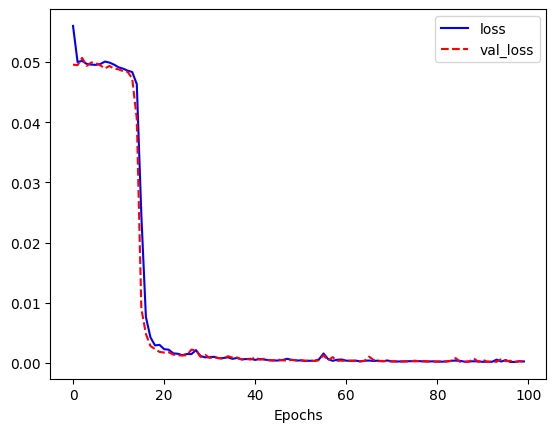

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [7]:
model.evaluate(X[:2560], y[:2560])
pred = model.predict(X[2560:2565])

for i in range(5):
    print(y[2560+i], '\t', pred[i][0], '\tdiff :', abs(pred[i][0] - y[2560+i]))

80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.6340e-04
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
0.5474186665436604 	 0.5442891 	diff : 0.003129554452595995
0.11183891743217048 	 0.11402947 	diff : 0.0021905496736950025
0.4955119022012412 	 0.49183318 	diff : 0.003678722012108504
0.01912186655660127 	 0.027493298 	diff : 0.008371431497140185
0.5473910438221216 	 0.5339137 	diff : 0.013477371851754127


In [8]:
pred = model.predict(X[2560:])
fail = 0

for i in range(len(pred)):
    if abs(pred[i][0] - y[2560+i]) >= 0.04:
        fail += 1

print('correctness :', (440-fail) / 440 * 100, '%')

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step
correctness : 98.18181818181819 %


In [ ]:
import yfinance as yf 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras import Input, layers
import matplotlib.pyplot as plt

# 데이터 다운로드
data = yf.download('AAPL', start='2023-01-01', end='2023-12-31')
data_close = data[['Close']]

# 데이터 전처리
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_close)

# 시계열 데이터 함수 생성
def  create_sequences(data, time_steps):
    Xs, ys = [], []
    for i in range(len(data) - time_steps):
        Xs.append(data[i:(i + time_steps), 0])
        ys.append(data[i + time_steps, 0])
    return np.array(Xs), np.array(ys)

# 함수를 이용해서 시계열 데이터 생성
TIME_STEPS = 50
X, y = create_sequences(scaled_data, TIME_STEPS)

# 학습 및 검증 데이터 분할 - 시계열 데이터는 데이터를 섞으면 안된다. (shuffle=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# LSTM 모델 구성
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),
    LSTM(16),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')


